# Best Neighborhood in Pittsburgh

## Team Burgh Explorers

## Introduction

Pittsburgh is a big city with lots of neighborhoods. We The Burgh Explorers have been doing our research for the past month in figuring out what is the best neigborhood here in Pittsburgh. Having around 90 neighborhoods, every neighborhood has an area where it is best at. But out of every factors that can determine the best neighborhood, we used:

- Number of POGOH bike stations along with its concentration
- Number of Public Schools
- 
    


## Metrics Used

### We determined our metric by selecting the deciding element for the following criteria.

#### Total Docks in Neighborhood

The total number of bike docks in a neighborhood is an important indicator of how well that area is supported by the bikeshare system. Neighborhoods with more docks generally provide greater availability and reliability for riders, because more docks mean a higher capacity for bikes to be picked up or returned at any given time. This reduces the likelihood of empty stations (no bikes to rent) or full stations (no space to return a bike), which directly improves the convenience of using the system.

For this reason, we used a data table from WPRDC's "https://data.wprdc.org/dataset/station-locations" a data that was made on October 2025 containing a list of bike stations at a specific locations across Pittsburgh.

For "Number of POGOH bike stations", I examined bikeshare station data to evaluate which neighborhood could be considered the “best” based on station and dock availability. Using the dataset fields (Id, Name, Total Docks, Latitude, Longitude, Neighborhood), I grouped stations by neighborhood and calculated key metrics such as the total number of stations, total docks, and dock density (average docks per station). Comparing these metrics allowed me to identify which neighborhoods are most highly served by bikeshare infrastructure and to reason about which might be considered the most convenient or best-supported areas for riders.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import fpsnippets as fp

# Load your pogo station dataset
pogoh_data = pd.read_csv("pogoh-station-locations-october-2025.csv")

# Define converter function
def latlon_to_neighborhood(row):
    return fp.geo_to_neighborhood(row['Latitude'], row['Longitude'])

# Apply conversion to each row
pogoh_data['Neighborhood'] = pogoh_data.apply(latlon_to_neighborhood, axis=1)


In [11]:
pogoh_counts = pogoh_data['Neighborhood'].value_counts()

# Convert to DataFrame and rename the column
pogoh_counts_df = pogoh_counts.rename_axis('Neighborhood').reset_index(name='Number of Pogoh Stations')

pogoh_counts_df.style.hide(axis="index")


Neighborhood,Number of Pogoh Stations
Central Oakland,7
Central Business District,6
Shadyside,5
South Side Flats,4
North Oakland,4
Hazelwood,3
Bloomfield,3
Strip District,3
Homewood South,3
South Shore,2


For "Total docks per neighborhood", which determines the number of docks across the whole neighborhood:

In [10]:
dock_counts_df = (
    pogoh_data.groupby("Neighborhood")["Total Docks"]
             .sum()
             .rename("Total Number of Docks")
             .reset_index()
)

dock_counts_df.sort_values(by=['Total Number of Docks'], ascending=False).style.hide(axis="index")

Neighborhood,Total Number of Docks
Central Oakland,144
Central Business District,98
North Oakland,88
Shadyside,87
South Side Flats,76
Strip District,53
Bloomfield,49
Hazelwood,49
Homewood South,45
Allegheny Center,38


- Best: Central Oakland with 144 docks
- Worst: Central Lawrenceville, East Liberty, Middle Hill,	Friendship, and	Larimer	with 15 docks each.

According to the bar graph below, it does not come to a suprise that Central Oakland having the most bike docks across the neighborhood as it is a home to colleges like the University of Pittsburgh.

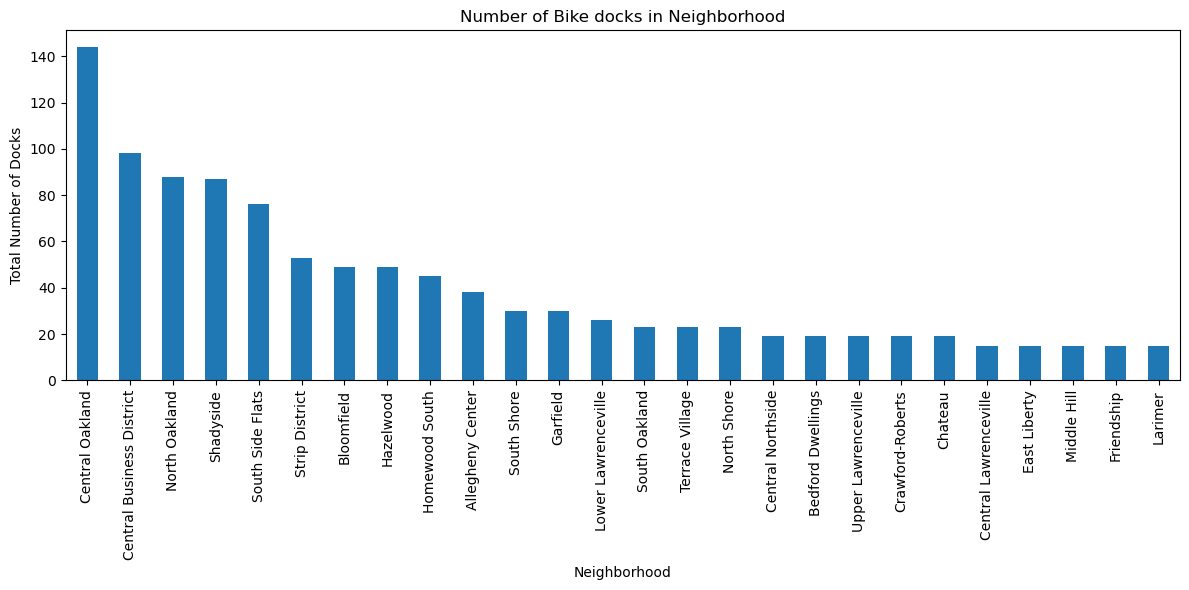

In [9]:
plt.figure(figsize=(12, 6))
dock_counts_df.set_index('Neighborhood')['Total Number of Docks'] \
    .sort_values(ascending=False) \
    .plot(kind='bar')

plt.xlabel("Neighborhood")
plt.ylabel("Total Number of Docks")
plt.title("Number of Bike docks in Neighborhood")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### Number of Public Schools

To evaluate Pittsburgh neighborhoods using only the school dataset, I created a metric based on the number of public schools located in each neighborhood. Using the 'Final-Project-Snippets' file, I mapped every school to its corresponding neighborhood using latitude and longitude, then counted how many schools each neighborhood contains. The core idea behind this metric is that a higher concentration of public schools represents stronger educational access, more community resources, and greater support for families. After calculating these counts, I normalized the values onto a 0–10 scale so neighborhoods could be compared fairly, regardless of size. This allows me to identify which neighborhoods offer the greatest access to educational infrastructure and therefore score the highest based solely on school presence.

For this reason, we used a data table from WPRDC's "https://data.wprdc.org/dataset/pittsburgh-public-school-locations" a data that was made on April 2019 containing a list of public schools at a specific locations across Pittsburgh.

For number of public schools per neighborhood, using the data given we determine:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import fpsnippets

# Load your pogo station dataset
school_data = pd.read_csv("pps_schoolsapr2019publish.csv")

# Define converter function
def latlon_to_neighborhood(row):
    return fpsnippets.geo_to_neighborhood(row['latitude'], row['longitude'])

# Apply conversion to each row
school_data['Neighborhood'] = school_data.apply(latlon_to_neighborhood, axis=1)

In [3]:
school_counts = school_data['Neighborhood'].value_counts()

# Convert to DataFrame and rename the column
school_counts_df = school_counts.rename_axis('Neighborhood').reset_index(name='Number of Schools')
school_counts_df

,Neighborhood,Number of Schools
0,Squirrel Hill South,6
1,Allegheny Center,6
2,Beechview,5
3,Brookline,5
4,Carrick,5
5,East Liberty,4
6,Manchester,4
7,Brighton Heights,3
8,Crafton Heights,3
9,North Oakland,3


<Figure size 1200x600 with 0 Axes>

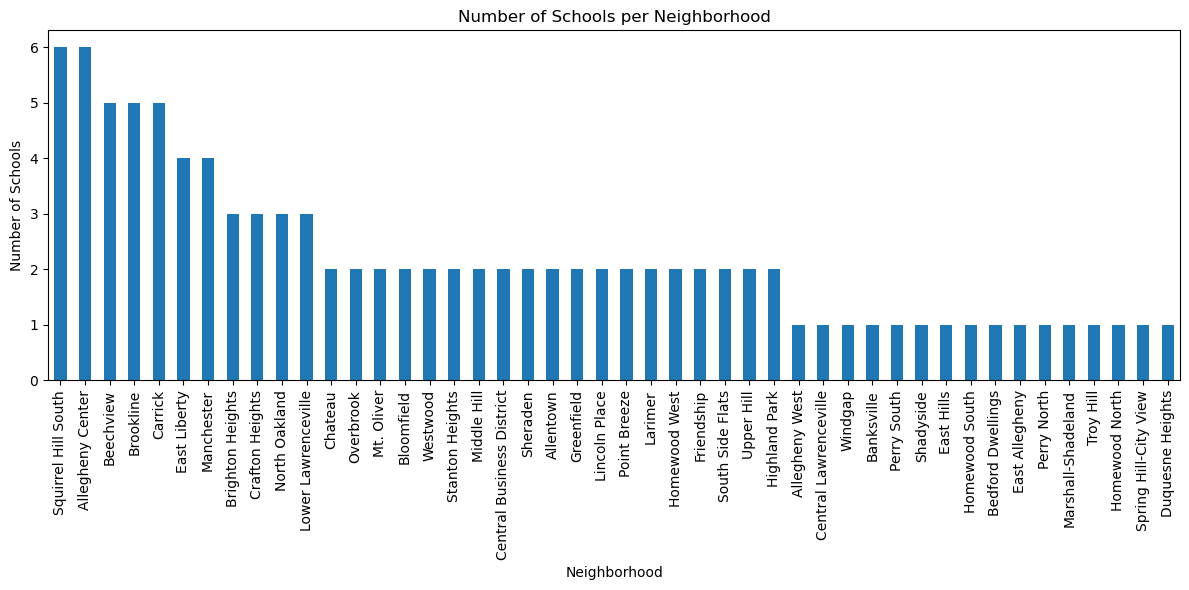

In [4]:
plt.figure(figsize=(12, 6))

school_counts_df.set_index('Neighborhood')['Number of Schools'] \
    .sort_values(ascending=False) \
    .plot(kind='bar')

plt.xlabel("Neighborhood")
plt.ylabel("Number of Schools")
plt.title("Number of Schools per Neighborhood")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


- Best: Squirrel Hill South
- Worst: No standing worst, 10+ neighborhoods having only 1 public school.